In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("data/names.txt", 'r') as f:
  words = f.read().splitlines()

In [4]:
chars = sorted(list(set(''.join(words))))
s_to_i = {s:i+1 for i,s in enumerate(chars)}
s_to_i['.'] = 0
i_to_s = {i:s for s,i in s_to_i.items()}

In [85]:
block_size = 3
X, Y = [], []
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = s_to_i[ch]
    X.append(context)
    Y.append(ix)
    #print("".join(i_to_s[i] for i in context), "->", i_to_s[ix])
    #context[0] = context[1]
    #context[1] = context[2]
    #context[2] = ix
    context = context[1:] + [ix]
    
X = torch.tensor(X)
Y = torch.tensor(Y)

In [14]:
C = torch.randn((27, 2))

In [ ]:
# C[5]   C[[5, 6]]   C[torch.tensor([5, 6])]

In [30]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [31]:
X[0, 0]

tensor(0)

In [32]:
C[0]

tensor([0.9187, 0.7791])

In [33]:
C[X[0, 0]]

tensor([0.9187, 0.7791])

In [34]:
C[X][0, 0]

tensor([0.9187, 0.7791])

In [35]:
C[X]

tensor([[[ 0.9187,  0.7791],
         [ 0.9187,  0.7791],
         [ 0.9187,  0.7791]],

        [[ 0.9187,  0.7791],
         [ 0.9187,  0.7791],
         [ 0.6389, -1.3597]],

        [[ 0.9187,  0.7791],
         [ 0.6389, -1.3597],
         [-0.6063, -0.4680]],

        [[ 0.6389, -1.3597],
         [-0.6063, -0.4680],
         [-0.6063, -0.4680]],

        [[-0.6063, -0.4680],
         [-0.6063, -0.4680],
         [ 0.2914, -1.7724]],

        [[ 0.9187,  0.7791],
         [ 0.9187,  0.7791],
         [ 0.9187,  0.7791]],

        [[ 0.9187,  0.7791],
         [ 0.9187,  0.7791],
         [ 0.6085,  0.4212]],

        [[ 0.9187,  0.7791],
         [ 0.6085,  0.4212],
         [-0.1190, -0.5710]],

        [[ 0.6085,  0.4212],
         [-0.1190, -0.5710],
         [ 0.0918,  0.9060]],

        [[-0.1190, -0.5710],
         [ 0.0918,  0.9060],
         [-0.4273,  0.8745]],

        [[ 0.0918,  0.9060],
         [-0.4273,  0.8745],
         [ 0.0918,  0.9060]],

        [[-0.4273,  0

In [36]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
#W1 = torch.randn((6, 100))
#b1 = torch.randn(100)
# emb @ W + b1 does not work yet

In [40]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [42]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [43]:
emb.view(32, 6)

tensor([[ 0.9187,  0.7791,  0.9187,  0.7791,  0.9187,  0.7791],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.6389, -1.3597],
        [ 0.9187,  0.7791,  0.6389, -1.3597, -0.6063, -0.4680],
        [ 0.6389, -1.3597, -0.6063, -0.4680, -0.6063, -0.4680],
        [-0.6063, -0.4680, -0.6063, -0.4680,  0.2914, -1.7724],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.9187,  0.7791],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.6085,  0.4212],
        [ 0.9187,  0.7791,  0.6085,  0.4212, -0.1190, -0.5710],
        [ 0.6085,  0.4212, -0.1190, -0.5710,  0.0918,  0.9060],
        [-0.1190, -0.5710,  0.0918,  0.9060, -0.4273,  0.8745],
        [ 0.0918,  0.9060, -0.4273,  0.8745,  0.0918,  0.9060],
        [-0.4273,  0.8745,  0.0918,  0.9060,  0.2914, -1.7724],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.9187,  0.7791],
        [ 0.9187,  0.7791,  0.9187,  0.7791,  0.2914, -1.7724],
        [ 0.9187,  0.7791,  0.2914, -1.7724, -0.4273,  0.8745],
        [ 0.2914, -1.7724, -0.4273,  0.8

In [45]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [46]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [48]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
print(h.shape)
# emb.view(-1, 6) @ W + b1
# 32, 100
#  1, 100

torch.Size([32, 100])


In [55]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [57]:
logits = h @ W2 + b2

In [60]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [63]:
probs.shape, probs[0].sum()

(torch.Size([32, 27]), tensor(1.))

In [67]:
loss = -probs[torch.arange(32), Y].log().mean()

In [68]:
loss

tensor(16.8739)

In [ ]:
##

In [86]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [109]:
g = torch.Generator().manual_seed(420)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [110]:
sum(p.nelement() for p in parameters)

3481

In [111]:
for p in parameters:
  p.requires_grad = True

In [106]:
# reasonable lr < 1, < 0.001
# torch.linspace(0.001, 1, 1000) # does not make sense to go through the sapce lineary
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
#lrs

In [112]:
lri = []
lossi = []
lr = 0.1

for i in range(1000):
  
  # minibach
  ix = torch.randint(0, X.shape[0], (32,))
  
  # forward
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2

  #counts = logits.exp()
  #probs = counts / counts.sum(1, keepdim=True)
  #loss = -probs[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Y[ix])
  #print(loss.item())
  
  # backward
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  for p in parameters:
    p.data -= lr * p.grad
    
  #lri.append(lre[i])
  #lossi.append(loss.item())
print(loss.item())

2.835505485534668


In [ ]:
logits.max(1), Y

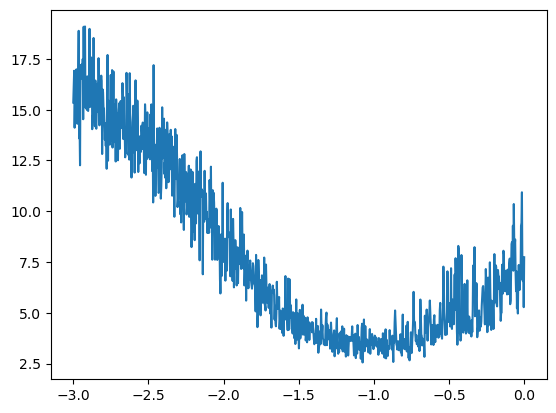

In [108]:
plt.plot(lri, lossi)